In [8]:
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False
  
if IN_COLAB:

    from google.colab import drive
    drive.mount('/content/drive')

    import sys
    sys.path.append('/content/drive/MyDrive/UDA_Sarcasm/models')
    data_path = '/content/drive/MyDrive/UDA_Sarcasm/data/'
    model_path = '/content/drive/MyDrive/UDA_Sarcasm/results/best/'
else:
    import sys
    sys.path.append('../models')
    data_path = '../data/'
    model_path = '../results/best/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from load_data import load_all_datasets, load_aug_datasets, print_info

ghosh, semeval, political, ptacek, sarc, isarcasm = load_all_datasets(data_path)
all_info = print_info(ghosh, semeval, political, ptacek, sarc, isarcasm)
all_info


,ghosh,semeval,political,ptacek,sarc,isarcasm
label,,,,,,
0,22725,1923,3260,25756,25000,3584
1,18478,1911,3260,25756,25000,766


In [3]:
from transformers import logging
logging.set_verbosity_error()
import torch
import json
from transformers import BertModel, BertConfig, BertTokenizer
from load_data import multi_dataset, aug_multi_Hidden_dataset
from utils import get_device, get_cfg
from createDataset import HiddenStateDataset
import os
import pandas as pd

device = get_device()
print('Running on device:', device)

source_name = ['ghosh', 'ptacek']
target_name = ['semeval', 'isarcasm']

# reproduce on test target dataset
semeval_mini = pd.read_csv(data_path + "semeval/semeval_test.tsv", sep= "\t")
isarcasm_mini = pd.read_csv(data_path + "iSarcasm/isarcasm_test.tsv", sep= "\t")

tokenizer_data = BertTokenizer.from_pretrained('bert-base-uncased')
config_data = BertConfig.from_pretrained('bert-base-uncased', output_hidden_states=True)
model_data = BertModel.from_pretrained('bert-base-uncased', config = config_data)
model_data = model_data.to(device)

mini_semeval = HiddenStateDataset(semeval_mini, model_data, tokenizer_data, device, 1, max_len = 30)
mini_isarcasm = HiddenStateDataset(isarcasm_mini, model_data, tokenizer_data, device, 1, max_len = 30)

source_dic  = aug_multi_Hidden_dataset([ghosh, ptacek], None, source_name, device,  layer = 3, max_len = 30, ratio = 0.7)
target_dic  = aug_multi_Hidden_dataset([semeval, isarcasm], [semeval, isarcasm], target_name, device,  layer = 1, max_len = 30, ratio = 1)

Running on device: cuda


# Reproduce 

In [4]:
cfg_1 = {
    "print_after_steps": 200,
    "batch_size": 300,
    "lr_encoder" : 1e-4,
    "lr_dis" : 1e-4,
    "lr_c" : 1e-4,
    "n_epochs": 5,
    
    "classifier_epochs": 5,
    "hidden_dropout_prob" :0.1,
    "max_len": 30,
    "results_dir":"/content/drive/MyDrive/UDA_Sarcasm/results/1_best_uda"
}

# test data

In [15]:
not_used = source_dic['ghosh' + '_val'] # will not be used in prediction

In [22]:
source = 'ghosh'
target = 'semeval'

print('================== Source: ', source, '|| Target: ', target,'==================')
tgt_encoder = hs_adda.HS_ADDN_Encoder_1()
discriminator = hs_adda.HS_ADDN_Discriminator_0()
src_classifier = hs_adda.HS_ADDN_Classifier_1()
trained_classifier = model_path+'1_test/'+source+'_'+target+'/classifier.pt'
src_classifier.load_state_dict(torch.load(trained_classifier, map_location=torch.device('cpu')))
trained_encoder = model_path + '1_test/'+source+'_'+target+'/target_encoder.pt'
tgt_encoder.load_state_dict(torch.load(trained_encoder, map_location=torch.device('cpu')))
trainer_two = hidden_trainer.Hidden_Trainer_One(cfg_1, tgt_encoder, src_classifier, discriminator, not_used, not_used, not_used, mini_semeval, device, source + '_' + target)
trainer_two.eval_model()

================== Source:  ghosh || Target:  semeval ==================
Target: Acc:0.6838, F1:0.6872, Precision:0.6974, recall:0.6838
Target_2: Acc:0.7083, F1:0.6064, Precision:0.6625, recall:0.5599


0.6872147619724274

In [73]:
source = 'ghosh'
target = 'isarcasm'

print('================== Source: ', source, '|| Target: ', target,'==================')
tgt_encoder = hs_adda.HS_ADDN_Encoder_1()
discriminator = hs_adda.HS_ADDN_Discriminator_0()
src_classifier = hs_adda.HS_ADDN_Classifier_1()
trained_classifier = model_path+'1_test/'+source+'_'+target+'/classifier.pt'
src_classifier.load_state_dict(torch.load(trained_classifier, map_location=torch.device('cpu')))
trained_encoder = model_path + '1_test/'+source+'_'+target+'/target_encoder.pt'
tgt_encoder.load_state_dict(torch.load(trained_encoder, map_location=torch.device('cpu')))
trainer_two = hidden_trainer.Hidden_Trainer_One(cfg_1, tgt_encoder, src_classifier, discriminator, not_used, not_used, not_used, mini_isarcasm, device, source + '_' + target)
trainer_two.eval_model()

================== Source:  ghosh || Target:  isarcasm ==================
Target: Acc:0.6198, F1:0.6077, Precision:0.6012, recall:0.6198
Target_2: Acc:0.7517, F1:0.3701, Precision:0.3327, recall:0.4173


0.6077200472354889

In [75]:
source = 'ptacek'
target = 'semeval'

print('================== Source: ', source, '|| Target: ', target,'==================')
tgt_encoder = hs_adda.HS_ADDN_Encoder_1()
discriminator = hs_adda.HS_ADDN_Discriminator_0()
src_classifier = hs_adda.HS_ADDN_Classifier_1()
trained_classifier = model_path+'1_test/'+source+'_'+target+'/classifier.pt'
src_classifier.load_state_dict(torch.load(trained_classifier, map_location=torch.device('cpu')))
trained_encoder = model_path + '1_test/'+source+'_'+target+'/target_encoder.pt'
tgt_encoder.load_state_dict(torch.load(trained_encoder, map_location=torch.device('cpu')))
trainer_two = hidden_trainer.Hidden_Trainer_One(cfg_1, tgt_encoder, src_classifier, discriminator, not_used, not_used, not_used, mini_semeval, device, source + '_' + target)
trainer_two.eval_model()

================== Source:  ptacek || Target:  semeval ==================
Target: Acc:0.6727, F1:0.6519, Precision:0.6672, recall:0.6727
Target_2: Acc:0.6533, F1:0.6377, Precision:0.5446, recall:0.7693


0.6518898904323578

In [88]:
source = 'ptacek'
target = 'semeval'

print('================== Source: ', source, '|| Target: ', target,'==================')
tgt_encoder = hs_adda.HS_ADDN_Encoder_1()
discriminator = hs_adda.HS_ADDN_Discriminator_0()
src_classifier = hs_adda.HS_ADDN_Classifier_1()
trained_classifier = model_path+'1_test/'+source+'_'+target+'/classifier.pt'
src_classifier.load_state_dict(torch.load(trained_classifier, map_location=torch.device('cpu')))
trained_encoder = model_path + '1_test/'+source+'_'+target+'/target_encoder.pt'
tgt_encoder.load_state_dict(torch.load(trained_encoder, map_location=torch.device('cpu')))
trainer_two = hidden_trainer.Hidden_Trainer_One(cfg_1, tgt_encoder, src_classifier, discriminator, not_used, not_used, not_used, mini_semeval, device, source + '_' + target)
trainer_two.eval_model()

================== Source:  ptacek || Target:  semeval ==================
Target: Acc:0.6824, F1:0.6592, Precision:0.6788, recall:0.6824
Target_2: Acc:0.6600, F1:0.6452, Precision:0.5452, recall:0.7900


0.6592410504817963

In [47]:
source = 'ptacek'
target = 'isarcasm'

print('================== Source: ', source, '|| Target: ', target,'==================')
tgt_encoder = hs_adda.HS_ADDN_Encoder_1()
discriminator = hs_adda.HS_ADDN_Discriminator_0()
src_classifier = hs_adda.HS_ADDN_Classifier_1()
trained_classifier = model_path+'1_test/'+source+'_'+target+'/classifier.pt'
src_classifier.load_state_dict(torch.load(trained_classifier, map_location=torch.device('cpu')))
trained_encoder = model_path + '1_test/'+source+'_'+target+'/target_encoder.pt'
tgt_encoder.load_state_dict(torch.load(trained_encoder, map_location=torch.device('cpu')))
trainer_two = hidden_trainer.Hidden_Trainer_One(cfg_1, tgt_encoder, src_classifier, discriminator, not_used, not_used, not_used, mini_isarcasm, device, source + '_' + target)
trainer_two.eval_model()

================== Source:  ptacek || Target:  isarcasm ==================
Target: Acc:0.6467, F1:0.5428, Precision:0.5941, recall:0.6467
Target_2: Acc:0.5783, F1:0.4153, Precision:0.2867, recall:0.7595


0.5427928566932678

# equal layer

In [ ]:
import hs_adda
import hidden_trainer

for source in source_name:
    src_train = source_dic[source + '_train']
    src_val = source_dic[source + '_val']
    for target in target_name:
        tgt_train = target_dic[target + '_train']
        tgt_val = target_dic[target + '_val']
        print('================== Source: ', source, '|| Target: ', target,'==================')
        tgt_encoder = hs_adda.HS_ADDN_Encoder_0()
        discriminator = hs_adda.HS_ADDN_Discriminator_0()
        src_classifier = hs_adda.HS_ADDN_Classifier_0()
        trained_classifier = model_path + '1_equal/'+source+'_'+target+'/classifier.pt'
        print('load classifier from:', trained_classifier)
        src_classifier.load_state_dict(torch.load(trained_classifier, map_location=torch.device('cpu')))
        trained_encoder = model_path + '1_equal/'+source+'_'+target+'/target_encoder.pt'
        print('load trained_encoder from:', trained_encoder)
        tgt_encoder.load_state_dict(torch.load(trained_encoder, map_location=torch.device('cpu')))
        trainer_one = hidden_trainer.Hidden_Trainer_One(cfg_1, tgt_encoder, src_classifier, discriminator, src_train, src_val, tgt_train, tgt_val, device, source + '_' + target)
        trainer_one.eval_model()

Target: Acc:0.6030, F1:0.5942, Precision:0.6128, recall:0.6030
Target_2: Acc:0.6039, F1:0.5332, Precision:0.6439, recall:0.4554
================== Source:  ghosh || Target:  isarcasm ==================
load classifier from: ../results/best/1_equal/ghosh_isarcasm/classifier.pt
load trained_encoder from: ../results/best/1_equal/ghosh_isarcasm/target_encoder.pt
Target: Acc:0.5738, F1:0.5609, Precision:0.5583, recall:0.5738
Target_2: Acc:0.7140, F1:0.3020, Precision:0.2630, recall:0.3583
================== Source:  ptacek || Target:  semeval ==================
load classifier from: ../results/best/1_equal/ptacek_semeval/classifier.pt
load trained_encoder from: ../results/best/1_equal/ptacek_semeval/target_encoder.pt
Target: Acc:0.6646, F1:0.6641, Precision:0.6655, recall:0.6646
Target_2: Acc:0.6650, F1:0.6516, Precision:0.6707, recall:0.6347
================== Source:  ptacek || Target:  isarcasm ==================
load classifier from: ../results/best/1_equal/ptacek_isarcasm/classifier.pt

# Target: Layer 1

In [ ]:
import hs_adda
import hidden_trainer

source_dic  = aug_multi_Hidden_dataset([ghosh, ptacek], None, source_name, device,  layer = 3, max_len = 30, ratio = 0.7)
target_dic  = aug_multi_Hidden_dataset([semeval, isarcasm], [semeval, isarcasm], target_name, device,  layer = 1, max_len = 30, ratio = 1)

for source in source_name:
    src_train = source_dic[source + '_train']
    src_val = source_dic[source + '_val']
    for target in target_name:
        tgt_train = target_dic[target + '_train']
        tgt_val = target_dic[target + '_val']
        print('================== Source: ', source, '|| Target: ', target,'==================')
        tgt_encoder = hs_adda.HS_ADDN_Encoder_1()
        discriminator = hs_adda.HS_ADDN_Discriminator_0()
        src_classifier = hs_adda.HS_ADDN_Classifier_1()
        trained_classifier = model_path + '1_all/'+source+'_'+target+'/classifier.pt'
        print('load classifier from:', trained_classifier)
        src_classifier.load_state_dict(torch.load(trained_classifier, map_location=torch.device('cpu')))
        trained_encoder = model_path + '1_all/'+source+'_'+target+'/target_encoder.pt'
        print('load trained_encoder from:', trained_encoder)
        tgt_encoder.load_state_dict(torch.load(trained_encoder, map_location=torch.device('cpu')))
        trainer_one = hidden_trainer.Hidden_Trainer_One(cfg_1, tgt_encoder, src_classifier, discriminator, src_train, src_val, tgt_train, tgt_val, device, source + '_' + target)
        trainer_one.eval_model()

================== Source:  ghosh || Target:  semeval ==================
load classifier from: ../results/best/1_all/ghosh_semeval/classifier.pt
load trained_encoder from: ../results/best/1_all/ghosh_semeval/target_encoder.pt
Target: Acc:0.6032, F1:0.6029, Precision:0.6035, recall:0.6032
Target_2: Acc:0.6036, F1:0.5944, Precision:0.6044, recall:0.5853
================== Source:  ghosh || Target:  isarcasm ==================
load classifier from: ../results/best/1_all/ghosh_isarcasm/classifier.pt
load trained_encoder from: ../results/best/1_all/ghosh_isarcasm/target_encoder.pt
Target: Acc:0.5850, F1:0.5827, Precision:0.5836, recall:0.5850
Target_2: Acc:0.7531, F1:0.3165, Precision:0.3113, recall:0.3274
================== Source:  ptacek || Target:  semeval ==================
load classifier from: ../results/best/1_all/ptacek_semeval/classifier.pt
load trained_encoder from: ../results/best/1_all/ptacek_semeval/target_encoder.pt
Target: Acc:0.6682, F1:0.6646, Precision:0.6742, recall:0.66

# layer 3

In [ ]:
import hs_adda
import hidden_trainer

source_dic  = aug_multi_Hidden_dataset([ghosh, ptacek], None, source_name, device,  layer = 5, max_len = 30, ratio = 0.7)
target_dic  = aug_multi_Hidden_dataset([semeval, isarcasm], [semeval, isarcasm], target_name, device,  layer = 3, max_len = 30, ratio = 1)

for source in source_name:
    src_train = source_dic[source + '_train']
    src_val = source_dic[source + '_val']
    for target in target_name:
        tgt_train = target_dic[target + '_train']
        tgt_val = target_dic[target + '_val']
        print('================== Source: ', source, '|| Target: ', target,'==================')
        tgt_encoder = hs_adda.HS_ADDN_Encoder_3()
        discriminator = hs_adda.HS_ADDN_Discriminator_0()
        src_classifier = hs_adda.HS_ADDN_Classifier_3()
        trained_classifier = model_path + '3_all/'+source+'_'+target+'/classifier.pt'
        print('load classifier from:', trained_classifier)
        src_classifier.load_state_dict(torch.load(trained_classifier, map_location=torch.device('cpu')))
        trained_encoder = model_path + '3_all/'+source+'_'+target+'/target_encoder.pt'
        print('load trained_encoder from:', trained_encoder)
        tgt_encoder.load_state_dict(torch.load(trained_encoder, map_location=torch.device('cpu')))
        trainer_one = hidden_trainer.Hidden_Trainer_One(cfg_1, tgt_encoder, src_classifier, discriminator, src_train, src_val, tgt_train, tgt_val, device, source + '_' + target)
        trainer_one.eval_model()

================== Source:  ghosh || Target:  semeval ==================
load classifier from: ../results/best/3_all/ghosh_semeval/classifier.pt
load trained_encoder from: ../results/best/3_all/ghosh_semeval/target_encoder.pt
Target: Acc:0.5751, F1:0.5337, Precision:0.6126, recall:0.5751
Target_2: Acc:0.5733, F1:0.3990, Precision:0.6800, recall:0.2841
================== Source:  ghosh || Target:  isarcasm ==================
load classifier from: ../results/best/3_all/ghosh_isarcasm/classifier.pt
load trained_encoder from: ../results/best/3_all/ghosh_isarcasm/target_encoder.pt
Target: Acc:0.5508, F1:0.5391, Precision:0.5389, recall:0.5508
Target_2: Acc:0.6931, F1:0.2732, Precision:0.2365, recall:0.3292
================== Source:  ptacek || Target:  semeval ==================
load classifier from: ../results/best/3_all/ptacek_semeval/classifier.pt
load trained_encoder from: ../results/best/3_all/ptacek_semeval/target_encoder.pt
Target: Acc:0.6585, F1:0.6548, Precision:0.6652, recall:0.65

# Layer 5

In [ ]:
import hs_adda
import hidden_trainer

source_dic  = aug_multi_Hidden_dataset([ghosh, ptacek], None, source_name, device,  layer = 7, max_len = 30, ratio = 0.7)
target_dic  = aug_multi_Hidden_dataset([semeval, isarcasm], [semeval, isarcasm], target_name, device,  layer = 5, max_len = 30, ratio = 1)

for source in source_name:
    src_train = source_dic[source + '_train']
    src_val = source_dic[source + '_val']
    for target in target_name:
        tgt_train = target_dic[target + '_train']
        tgt_val = target_dic[target + '_val']
        print('================== Source: ', source, '|| Target: ', target,'==================')
        tgt_encoder = hs_adda.HS_ADDN_Encoder_5()
        discriminator = hs_adda.HS_ADDN_Discriminator_0()
        src_classifier = hs_adda.HS_ADDN_Classifier_5()
        trained_classifier = model_path + '5_all/'+source+'_'+target+'/classifier.pt'
        print('load classifier from:', trained_classifier)
        src_classifier.load_state_dict(torch.load(trained_classifier, map_location=torch.device('cpu')))
        trained_encoder = model_path + '5_all/'+source+'_'+target+'/target_encoder.pt'
        print('load trained_encoder from:', trained_encoder)
        tgt_encoder.load_state_dict(torch.load(trained_encoder, map_location=torch.device('cpu')))
        trainer_one = hidden_trainer.Hidden_Trainer_One(cfg_1, tgt_encoder, src_classifier, discriminator, src_train, src_val, tgt_train, tgt_val, device, source + '_' + target)
        trainer_one.eval_model()

================== Source:  ghosh || Target:  semeval ==================
load classifier from: ../results/best/5_all/ghosh_semeval/classifier.pt
load trained_encoder from: ../results/best/5_all/ghosh_semeval/target_encoder.pt
Target: Acc:0.5846, F1:0.5566, Precision:0.6109, recall:0.5846
Target_2: Acc:0.5844, F1:0.4469, Precision:0.6654, recall:0.3373
================== Source:  ghosh || Target:  isarcasm ==================
load classifier from: ../results/best/5_all/ghosh_isarcasm/classifier.pt
load trained_encoder from: ../results/best/5_all/ghosh_isarcasm/target_encoder.pt
Target: Acc:0.5817, F1:0.4704, Precision:0.5484, recall:0.5817
Target_2: Acc:0.5079, F1:0.3306, Precision:0.2175, recall:0.6956
================== Source:  ptacek || Target:  semeval ==================
load classifier from: ../results/best/5_all/ptacek_semeval/classifier.pt
load trained_encoder from: ../results/best/5_all/ptacek_semeval/target_encoder.pt
Target: Acc:0.6615, F1:0.6575, Precision:0.6676, recall:0.66

# Layer 7

In [ ]:
import hs_adda
import hidden_trainer

source_dic  = aug_multi_Hidden_dataset([ghosh, ptacek], None, source_name, device,  layer = 9, max_len = 30, ratio = 0.7)
target_dic  = aug_multi_Hidden_dataset([semeval, isarcasm], [semeval, isarcasm], target_name, device,  layer = 7, max_len = 30, ratio = 1)

for source in source_name:
    src_train = source_dic[source + '_train']
    src_val = source_dic[source + '_val']
    for target in target_name:
        tgt_train = target_dic[target + '_train']
        tgt_val = target_dic[target + '_val']
        print('================== Source: ', source, '|| Target: ', target,'==================')
        tgt_encoder = hs_adda.HS_ADDN_Encoder_7()
        discriminator = hs_adda.HS_ADDN_Discriminator_0()
        src_classifier = hs_adda.HS_ADDN_Classifier_7()
        trained_classifier = model_path + '7_all/'+source+'_'+target+'/classifier.pt'
        print('load classifier from:', trained_classifier)
        src_classifier.load_state_dict(torch.load(trained_classifier, map_location=torch.device('cpu')))
        trained_encoder = model_path + '7_all/'+source+'_'+target+'/target_encoder.pt'
        print('load trained_encoder from:', trained_encoder)
        tgt_encoder.load_state_dict(torch.load(trained_encoder, map_location=torch.device('cpu')))
        trainer_one = hidden_trainer.Hidden_Trainer_One(cfg_1, tgt_encoder, src_classifier, discriminator, src_train, src_val, tgt_train, tgt_val, device, source + '_' + target)
        trainer_one.eval_model()

================== Source:  ghosh || Target:  semeval ==================
load classifier from: ../results/best/7_all/ghosh_semeval/classifier.pt
load trained_encoder from: ../results/best/7_all/ghosh_semeval/target_encoder.pt
Target: Acc:0.5832, F1:0.5684, Precision:0.5967, recall:0.5832
Target_2: Acc:0.5842, F1:0.4877, Precision:0.6302, recall:0.3992
================== Source:  ghosh || Target:  isarcasm ==================
load classifier from: ../results/best/7_all/ghosh_isarcasm/classifier.pt
load trained_encoder from: ../results/best/7_all/ghosh_isarcasm/target_encoder.pt
Target: Acc:0.5742, F1:0.5456, Precision:0.5496, recall:0.5742
Target_2: Acc:0.6674, F1:0.3106, Precision:0.2447, recall:0.4294
================== Source:  ptacek || Target:  semeval ==================
load classifier from: ../results/best/7_all/ptacek_semeval/classifier.pt
load trained_encoder from: ../results/best/7_all/ptacek_semeval/target_encoder.pt
Target: Acc:0.6447, F1:0.6368, Precision:0.6587, recall:0.64

# comparsion among all layers

In [ ]:
my_file = open("../results/text/layer.txt","r").readlines()
layer = ''
# 8 means equal layers
all = {'1':{'ghosh_semeval':None, 'ghosh_isarcasm':None, 'ptacek_semeval':None, 'ptacek_isarcasm':None},'3':{'ghosh_semeval':None, 'ghosh_isarcasm':None, 'ptacek_semeval':None, 'ptacek_isarcasm':None},
       '5':{'ghosh_semeval':None, 'ghosh_isarcasm':None, 'ptacek_semeval':None, 'ptacek_isarcasm':None},'7':{'ghosh_semeval':None, 'ghosh_isarcasm':None, 'ptacek_semeval':None, 'ptacek_isarcasm':None},
       '8':{'ghosh_semeval':None, 'ghosh_isarcasm':None, 'ptacek_semeval':None, 'ptacek_isarcasm':None} }
name_dic = {0:'ghosh_semeval', 1:'ghosh_isarcasm', 2:'ptacek_semeval', 3:'ptacek_isarcasm'}

result = {}
for i,line in enumerate(my_file):
    if line.startswith("##"):
        layer = line[3:4]
        index = 0
    if line.startswith("================== Source"):
        f1 = my_file[i+3].split(" ")[2][-7:-1]
        precision = my_file[i+3].split(" ")[3][-7:-1]
        recall = my_file[i+3].split(" ")[4][-7:-1]
        result['f1'] = (f1)
        result['precision'] = (precision)
        result['recall'] = (recall)
        name = name_dic[index]
        all[layer][name]= result
        index += 1
        result = {}
results = pd.DataFrame.from_dict({(i,j): all[i][j] 
                                for i in all.keys() 
                                for j in all[i].keys()},
                                orient='index')
results

f1 precision  recall
1 ghosh_semeval    0.6029    0.6035  0.6032
  ghosh_isarcasm   0.5827    0.5836  0.5850
  ptacek_semeval   0.6646    0.6742  0.6682
  ptacek_isarcasm  0.5789    0.5759  0.5859
3 ghosh_semeval    0.5337    0.6126  0.5751
  ghosh_isarcasm   0.5391    0.5389  0.5508
  ptacek_semeval   0.6548    0.6652  0.6585
  ptacek_isarcasm  0.5784    0.5768  0.6089
5 ghosh_semeval    0.5566    0.6109  0.5846
  ghosh_isarcasm   0.4704    0.5484  0.5817
  ptacek_semeval   0.6575    0.6676  0.6615
  ptacek_isarcasm  0.5490    0.5624  0.6003
7 ghosh_semeval    0.5684    0.5967  0.5832
  ghosh_isarcasm   0.5456    0.5496  0.5742
  ptacek_semeval   0.6368    0.6587  0.6447
  ptacek_isarcasm  0.5479    0.5619  0.5992
8 ghosh_semeval    0.5942    0.6128  0.6030
  ghosh_isarcasm   0.5609    0.5583  0.5738
  ptacek_semeval   0.6641    0.6655  0.6646
  ptacek_isarcasm  0.5515    0.5525  0.5527

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


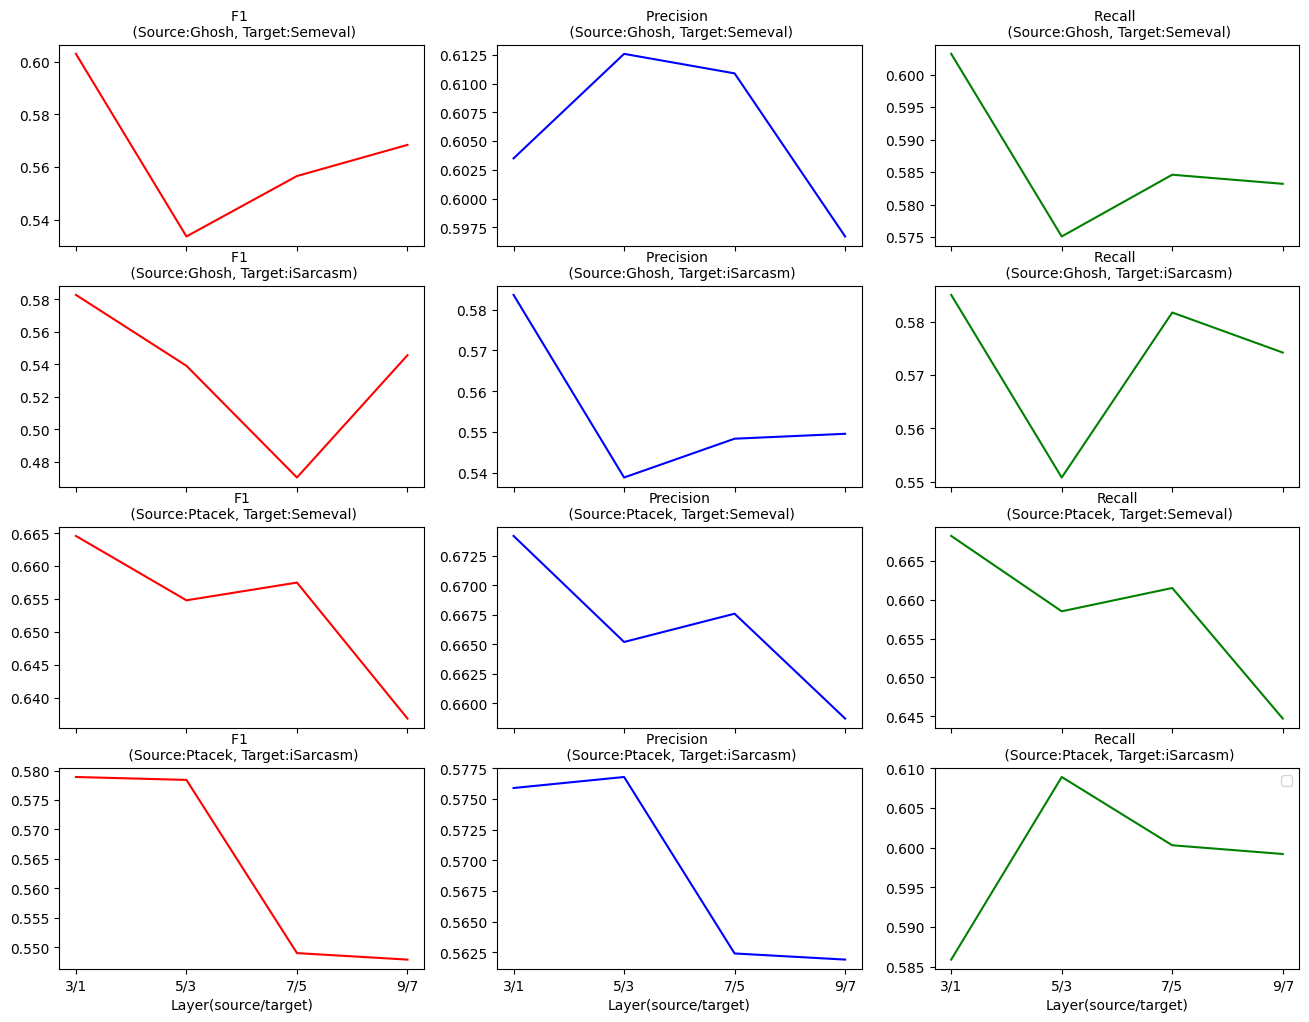

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 3, figsize=(16,12), sharex= True)
# fig.suptitle('Change Over Different Layers')
x = ['3/1','5/3','7/5','9/7']
for index in range(0, 4):
    f1=[]
    precision=[]
    recall=[]
    for i in range(0,len(results["f1"].values) -4 ,4):
        f1.append(float(results["f1"].values[i+index]))
        precision.append(float(results["precision"].values[i+index]))
        recall.append(float(results["recall"].values[i+index]))
    axs[index,0].plot(x, f1, color = 'red')
    axs[index,1].plot(x, precision, color = 'blue')
    axs[index,2].plot(x, recall, color = 'green')


axs[0,0].set_title('F1 \n (Source:Ghosh, Target:Semeval)', fontsize=10)
axs[0,1].set_title('Precision \n (Source:Ghosh, Target:Semeval)', fontsize=10)
axs[0,2].set_title('Recall \n (Source:Ghosh, Target:Semeval)', fontsize=10)

axs[1,0].set_title('F1 \n (Source:Ghosh, Target:iSarcasm)', fontsize=10)
axs[1,1].set_title('Precision \n (Source:Ghosh, Target:iSarcasm)', fontsize=10)
axs[1,2].set_title('Recall \n (Source:Ghosh, Target:iSarcasm)', fontsize=10)

axs[2,0].set_title('F1\n (Source:Ptacek, Target:Semeval)', fontsize=10)
axs[2,1].set_title('Precision\n (Source:Ptacek, Target:Semeval)', fontsize=10)
axs[2,2].set_title('Recall\n (Source:Ptacek, Target:Semeval)', fontsize=10)

axs[3,0].set_title('F1 \n (Source:Ptacek, Target:iSarcasm)', fontsize=10)
axs[3,1].set_title('Precision \n (Source:Ptacek, Target:iSarcasm)', fontsize=10)
axs[3,2].set_title('Recall \n (Source:Ptacek, Target:iSarcasm)', fontsize=10)

axs[3,0].set(xlabel='Layer(source/target)')
axs[3,1].set(xlabel='Layer(source/target)')
axs[3,2].set(xlabel='Layer(source/target)')
plt.legend()
plt.show()


# comparasion among different augmentation techniques

In [ ]:
import hs_adda
import hidden_trainer

source_dic  = aug_multi_Hidden_dataset([ghosh, ptacek], None, source_name, device,  layer = 3, max_len = 30, ratio = 0.7)
target_dic  = aug_multi_Hidden_dataset([semeval, isarcasm], [semeval, isarcasm], target_name, device,  layer = 1, max_len = 30, ratio = 1)

for source in source_name:
    src_train = source_dic[source + '_train']
    src_val = source_dic[source + '_val']
    for target in target_name:
        tgt_train = target_dic[target + '_train']
        tgt_val = target_dic[target + '_val']
        print('================== Source: ', source, '|| Target: ', target,'==================')
        tgt_encoder = hs_adda.HS_ADDN_Encoder_1()
        discriminator = hs_adda.HS_ADDN_Discriminator_0()
        src_classifier = hs_adda.HS_ADDN_Classifier_1()
        trained_classifier = '../results/best/noaug/'+source+'_'+target+'/classifier.pt'
        print('load classifier from:', trained_classifier)
        src_classifier.load_state_dict(torch.load(trained_classifier, map_location=torch.device('cpu')))
        trained_encoder = '../results/best/noaug/'+source+'_'+target+'/target_encoder.pt'
        print('load trained_encoder from:', trained_encoder)
        tgt_encoder.load_state_dict(torch.load(trained_encoder, map_location=torch.device('cpu')))
        trainer_one = hidden_trainer.Hidden_Trainer_One(cfg_1, tgt_encoder, src_classifier, discriminator, src_train, src_val, tgt_train, tgt_val, device, source + '_' + target)
        trainer_one.eval_model()

================== Source:  ghosh || Target:  semeval ==================
load classifier from: ../results/best/noaug/ghosh_semeval/classifier.pt
load trained_encoder from: ../results/best/noaug/ghosh_semeval/target_encoder.pt
Target: Acc:0.5962, F1:0.5946, Precision:0.5976, recall:0.5962
Target_2: Acc:0.5967, F1:0.5727, Precision:0.6082, recall:0.5422
================== Source:  ghosh || Target:  isarcasm ==================
load classifier from: ../results/best/noaug/ghosh_isarcasm/classifier.pt
load trained_encoder from: ../results/best/noaug/ghosh_isarcasm/target_encoder.pt
Target: Acc:0.5923, F1:0.5895, Precision:0.5888, recall:0.5923
Target_2: Acc:0.7590, F1:0.3261, Precision:0.3211, recall:0.3351
================== Source:  ptacek || Target:  semeval ==================
load classifier from: ../results/best/noaug/ptacek_semeval/classifier.pt
load trained_encoder from: ../results/best/noaug/ptacek_semeval/target_encoder.pt
Target: Acc:0.6707, F1:0.6699, Precision:0.6707, recall:0.67

In [ ]:
import hs_adda
import hidden_trainer

source_dic  = aug_multi_Hidden_dataset([ghosh, ptacek], None, source_name, device,  layer = 3, max_len = 30, ratio = 0.7)
target_dic  = aug_multi_Hidden_dataset([semeval, isarcasm], [semeval, isarcasm], target_name, device,  layer = 1, max_len = 30, ratio = 1)

for source in source_name:
    src_train = source_dic[source + '_train']
    src_val = source_dic[source + '_val']
    for target in target_name:
        tgt_train = target_dic[target + '_train']
        tgt_val = target_dic[target + '_val']
        print('================== Source: ', source, '|| Target: ', target,'==================')
        tgt_encoder = hs_adda.HS_ADDN_Encoder_1()
        discriminator = hs_adda.HS_ADDN_Discriminator_0()
        src_classifier = hs_adda.HS_ADDN_Classifier_1()
        trained_classifier = '../results/best/repeat_noaug/'+source+'_'+target+'/classifier.pt'
        print('load classifier from:', trained_classifier)
        src_classifier.load_state_dict(torch.load(trained_classifier, map_location=torch.device('cpu')))
        trained_encoder = '../results/best/repeat_noaug/'+source+'_'+target+'/target_encoder.pt'
        print('load trained_encoder from:', trained_encoder)
        tgt_encoder.load_state_dict(torch.load(trained_encoder, map_location=torch.device('cpu')))
        trainer_one = hidden_trainer.Hidden_Trainer_One(cfg_1, tgt_encoder, src_classifier, discriminator, src_train, src_val, tgt_train, tgt_val, device, source + '_' + target)
        trainer_one.eval_model()

================== Source:  ghosh || Target:  semeval ==================
load classifier from: ../results/best/repeat_noaug/ghosh_semeval/classifier.pt
load trained_encoder from: ../results/best/repeat_noaug/ghosh_semeval/target_encoder.pt
Target: Acc:0.6096, F1:0.5890, Precision:0.6376, recall:0.6096
Target_2: Acc:0.6106, F1:0.4970, Precision:0.6986, recall:0.3865
================== Source:  ghosh || Target:  isarcasm ==================
load classifier from: ../results/best/repeat_noaug/ghosh_isarcasm/classifier.pt
load trained_encoder from: ../results/best/repeat_noaug/ghosh_isarcasm/target_encoder.pt
Target: Acc:0.5932, F1:0.5863, Precision:0.5843, recall:0.5932
Target_2: Acc:0.7462, F1:0.3294, Precision:0.3098, recall:0.3575
================== Source:  ptacek || Target:  semeval ==================
load classifier from: ../results/best/repeat_noaug/ptacek_semeval/classifier.pt
load trained_encoder from: ../results/best/repeat_noaug/ptacek_semeval/target_encoder.pt
Target: Acc:0.6643

In [ ]:
import hs_adda
import hidden_trainer

source_dic  = aug_multi_Hidden_dataset([ghosh, ptacek], None, source_name, device,  layer = 3, max_len = 30, ratio = 0.7)
target_dic  = aug_multi_Hidden_dataset([semeval, isarcasm], [semeval, isarcasm], target_name, device,  layer = 1, max_len = 30, ratio = 1)

for source in source_name:
    src_train = source_dic[source + '_train']
    src_val = source_dic[source + '_val']
    for target in target_name:
        tgt_train = target_dic[target + '_train']
        tgt_val = target_dic[target + '_val']
        print('================== Source: ', source, '|| Target: ', target,'==================')
        tgt_encoder = hs_adda.HS_ADDN_Encoder_1()
        discriminator = hs_adda.HS_ADDN_Discriminator_0()
        src_classifier = hs_adda.HS_ADDN_Classifier_1()
        trained_classifier = '../results/best/repeat_aug/'+source+'_'+target+'/classifier.pt'
        print('load classifier from:', trained_classifier)
        src_classifier.load_state_dict(torch.load(trained_classifier, map_location=torch.device('cpu')))
        trained_encoder = '../results/best/repeat_aug/'+source+'_'+target+'/target_encoder.pt'
        print('load trained_encoder from:', trained_encoder)
        tgt_encoder.load_state_dict(torch.load(trained_encoder, map_location=torch.device('cpu')))
        trainer_one = hidden_trainer.Hidden_Trainer_One(cfg_1, tgt_encoder, src_classifier, discriminator, src_train, src_val, tgt_train, tgt_val, device, source + '_' + target)
        trainer_one.eval_model()

================== Source:  ghosh || Target:  semeval ==================
load classifier from: ../results/best/repeat_aug/ghosh_semeval/classifier.pt
load trained_encoder from: ../results/best/repeat_aug/ghosh_semeval/target_encoder.pt
Target: Acc:0.5988, F1:0.5863, Precision:0.6123, recall:0.5988
Target_2: Acc:0.5992, F1:0.5145, Precision:0.6500, recall:0.4265
================== Source:  ghosh || Target:  isarcasm ==================
load classifier from: ../results/best/repeat_aug/ghosh_isarcasm/classifier.pt
load trained_encoder from: ../results/best/repeat_aug/ghosh_isarcasm/target_encoder.pt
Target: Acc:0.5950, F1:0.5817, Precision:0.5776, recall:0.5950
Target_2: Acc:0.7279, F1:0.3346, Precision:0.2960, recall:0.3891
================== Source:  ptacek || Target:  semeval ==================
load classifier from: ../results/best/repeat_aug/ptacek_semeval/classifier.pt
load trained_encoder from: ../results/best/repeat_aug/ptacek_semeval/target_encoder.pt
Target: Acc:0.6651, F1:0.6596,

In [ ]:
my_file = open("../results/text/aug.txt","r").readlines()
layer = ''
all = {'No_augment':{'ghosh_semeval':None, 'ghosh_isarcasm':None, 'ptacek_semeval':None, 'ptacek_isarcasm':None},'Augment':{'ghosh_semeval':None, 'ghosh_isarcasm':None, 'ptacek_semeval':None, 'ptacek_isarcasm':None},
       'Repeat_No_augment':{'ghosh_semeval':None, 'ghosh_isarcasm':None, 'ptacek_semeval':None, 'ptacek_isarcasm':None},'Repeat_augment':{'ghosh_semeval':None, 'ghosh_isarcasm':None, 'ptacek_semeval':None, 'ptacek_isarcasm':None}}
name_dic = {0:'ghosh_semeval', 1:'ghosh_isarcasm', 2:'ptacek_semeval', 3:'ptacek_isarcasm'}

result = {}
for i,line in enumerate(my_file):
    if line.startswith("##"):
        tokens = line.split(' ')
        layer = tokens[1][0:-1]
        index = 0
    if line.startswith("================== Source"):
        f1 = my_file[i+3].split(" ")[2][-7:-1]
        precision = my_file[i+3].split(" ")[3][-7:-1]
        recall = my_file[i+3].split(" ")[4][-7:-1]
        result['f1'] = (f1)
        result['precision'] = (precision)
        result['recall'] = (recall)
        name = name_dic[index]
        all[layer][name]= result
        index += 1
        result = {}
results = pd.DataFrame.from_dict({(i,j): all[i][j] 
                                for i in all.keys() 
                                for j in all[i].keys()},
                                orient='index')
results

f1 precision  recall
No_augment        ghosh_semeval    0.5946    0.5976  0.5962
                  ghosh_isarcasm   0.5895    0.5888  0.5923
                  ptacek_semeval   0.6699    0.6707  0.6707
                  ptacek_isarcasm  0.5361    0.5698  0.6174
Augment           ghosh_semeval    0.6029    0.6035  0.6032
                  ghosh_isarcasm   0.5827    0.5836  0.5850
                  ptacek_semeval   0.6646    0.6742  0.6682
                  ptacek_isarcasm  0.5789    0.5759  0.5859
Repeat_No_augment ghosh_semeval    0.5890    0.6376  0.6096
                  ghosh_isarcasm   0.5863    0.5843  0.5932
                  ptacek_semeval   0.6593    0.6721  0.6643
                  ptacek_isarcasm  0.5671    0.5645  0.5820
Repeat_augment    ghosh_semeval    0.5863    0.6123  0.5988
                  ghosh_isarcasm   0.5817    0.5776  0.5950
                  ptacek_semeval   0.6596    0.6756  0.6651
                  ptacek_isarcasm  0.5851    0.5803  0.6011